# WordCount in PySpark

This is the canonical WordCount example, that is often used to start with MapReduce.

We will read a large text file (downloaded from the Gutenberg project), parse it and do some counting.

Let's first import the necessary modules and the Spark Context

In [1]:
import sys
from pyspark import SparkContext
import re

Now we can write our WordCount program

In [2]:
def mapper(line):
    words = re.split("\W+", line)
    return [(w.lower(), 1) for w in words if w]

lines = sc.textFile("hdfs://10.10.50.98/user/ubuntu/big.txt")

counts = lines.flatMap(mapper).reduceByKey(lambda a, b: a+b).filter(lambda x: x[1] >= 50)

output = counts.collect()


Now let's inspect the output

Now, let's prepare the output to be plotted: we want to show the distribution of word frequency

In [4]:
sortedOutput = sorted(output, key = lambda x: -x[1])[:20]
sortedOutput

[(u'the', 115989178),
 (u'of', 64346247),
 (u'and', 57548793),
 (u'to', 48155050),
 (u'a', 37386067),
 (u'in', 32661994),
 (u'that', 20770488),
 (u'i', 20655905),
 (u'he', 18462062),
 (u'was', 18054583),
 (u'it', 17997614),
 (u'his', 15158087),
 (u'with', 14468219),
 (u'is', 14461048),
 (u'for', 13806502),
 (u'as', 13602241),
 (u'you', 12238328),
 (u'had', 10564870),
 (u'be', 10453612),
 (u'not', 10445464)]

Now we're ready to build our plot

Populating the interactive namespace from numpy and matplotlib


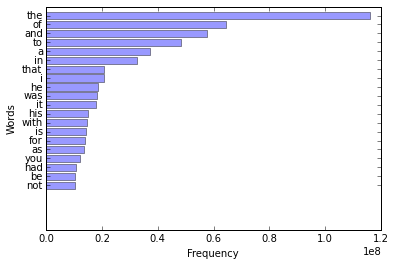

In [5]:
%pylab inline
import matplotlib.pyplot as plt

words = [w[0] for w in sortedOutput]
y_pos = range(len(sortedOutput))
frequency = [w[1] for w in sortedOutput]

plt.barh(y_pos, frequency[::-1], align='center', alpha=0.4)
plt.yticks(y_pos, words[::-1])
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.show()

And now let's stop the spark backend

In [6]:
sc.stop()